# Voraussetzung: Packages installieren

In [2]:
%pip install -r req_RandomForest.txt

Note: you may need to restart the kernel to use updated packages.


# 1. Bibliotheken importieren

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Daten laden

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 3. Vorverarbeitung

# TotalCharges hat teilweise leere Strings – umwandeln

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)  # entferne Zeilen mit NaN

# Entferne die 'customerID', die ist nicht hilfreich

In [7]:
df.drop("customerID", axis=1, inplace=True)

# Kategorische Features in Zahlen umwandeln

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# 4. Features und Zielvariable trennen

In [9]:

X = df.drop("Churn", axis=1)
y = df["Churn"]

# 5. Trainings- und Testdaten aufteilen

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Skalieren

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Modell trainieren

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 8. Vorhersage und Evaluation

In [13]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7903340440653873
[[932 101]
 [194 180]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# 9. Feature Importance

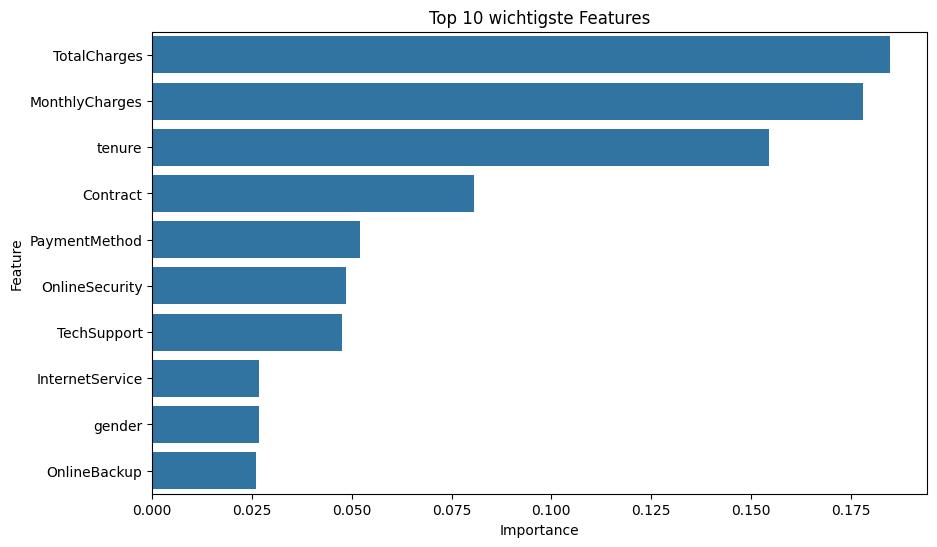

In [14]:
importances = model.feature_importances_
feat_names = X.columns
importance_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature")
plt.title("Top 10 wichtigste Features")
plt.show()

# 10. Konfusionsmatrix

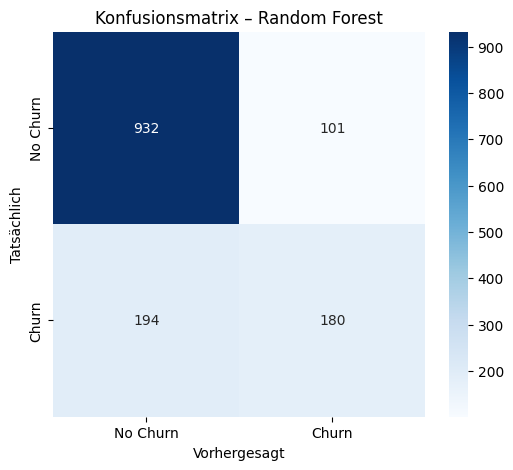

In [16]:
# Vorhersagen erzeugen
y_pred = model.predict(X_test)

# Konfusionsmatrix berechnen
cm = confusion_matrix(y_test, y_pred)
labels = ['No Churn', 'Churn']

# Visualisierung
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Konfusionsmatrix – Random Forest')
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.show()
